<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Malayalam/ULMFiT_Malayalam_transliterated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train1=pd.read_csv('/content/mal_final.csv')
train1

,Unnamed: 0,Unnamed: 0.1,text,category,trans,translation
0,0,0,Sunny chechi fans evide like adichu power kani...,unknown_state,{'ml': 'സുന്നി ചെച്ചി ഫാൻസ് എവിടെ ലൈക് അടിച്ച്...,"Sunny Cheung francs, 1992."
1,1,1,Angane july month ile ende aadyathe leave njan...,Positive,{'ml': 'അങ്ങനെ ജൂലൈ മോന്ത് എലി എന്ടെ ആദ്യത്തെ ...,"So, July, July 5th, July 5th, I'm on my first ..."
2,2,2,ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...,unknown_state,{'ml': 'ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിര...,Those waiting for my brother's new show---
3,3,3,ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........,Positive,{'ml': 'ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്ന...,"Now, I'm going to begin the hunt of Laeddis......"
4,4,4,Trailer powli oru raksha illa . Pakshea padam ...,Positive,{'ml': 'ട്രൈലർ പോളി ഒരു രക്ഷ ഇല്ല . പക്ഷീ പദം ...,The trilom system has no escape.
...,...,...,...,...,...,...
15883,15883,15883,Minimum 10 thavana kandavar maathram like adi,unknown_state,{'ml': 'മിനിമം 10 തവണ കണ്ടവർ മാത്രം ലൈക് അടി'},Only those who have seen 10 times have a license.
15884,15884,15884,Please cinema kaannaaan kothi aakunnu onnu rel...,Positive,{'ml': 'പ്ലീസ് സിനിമ കാണ്ണാൻ കൊത്തി ആകുന്നു ഒന...,"Please, let's just sign the film. Please."
15885,15885,15885,USA ok.. India No... Sadhacharam,unknown_state,{'ml': 'ഉഷ ഓക്.. ഇൻഡ്യ നോ... സദ്ചചരം'},Good-bye!
15886,15886,15886,nama hero december 12 wait & see mamamaga mah...,Positive,{'ml': 'നമഃ ഹീറോ ഡിസംബർ 12 വാറ്റ് & സീ മാമാമാ ...,The date of December 12 of the 12th Cygm 3 Cyg...


In [57]:
for i in range(len(train1)):
  train1['trans'][i]=train1['trans'][i][8:-2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
for i in range(len(train1)):
  if train1['category'][i]=='not-malayalam':
    train1['trans'][i]='NaN'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
train=pd.DataFrame(columns=['category','text'])
train['category']=train1['category'].append(train1['category'])
train['text']=train1['text'].append(train1['trans'])
train

,category,text
0,unknown_state,Sunny chechi fans evide like adichu power kani...
1,Positive,Angane july month ile ende aadyathe leave njan...
2,unknown_state,ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...
3,Positive,ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........
4,Positive,Trailer powli oru raksha illa . Pakshea padam ...
...,...,...
15883,unknown_state,മിനിമം 10 തവണ കണ്ടവർ മാത്രം ലൈക് അടി
15884,Positive,പ്ലീസ് സിനിമ കാണ്ണാൻ കൊത്തി ആകുന്നു ഒന്ന് റിലീ...
15885,unknown_state,ഉഷ ഓക്.. ഇൻഡ്യ നോ... സദ്ചചരം
15886,Positive,നമഃ ഹീറോ ഡിസംബർ 12 വാറ്റ് & സീ മാമാമാ മഹാ മാഗ്...


In [64]:
train=train.dropna()

In [65]:
val=pd.read_csv('/content/Mal_sentiment_full_dev.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val

,text,category
0,Mammooka ninghal mass aa pwoli item,Positive
1,Waiting for Malayalam movie For Tamil paiyan,not-malayalam
2,ദളപതി ഫാൻസിന്റെ വക ഒരു ഒന്നൊന്നര വിജയാശംസകൾ...,Positive
3,#Trailer pwolichuuuu ഓണത്തിന് വന്നങ്ങു തകർത്തേ...,Positive
4,Mammoookkaaaa polichadukkiii katta waiting nv 21,Positive
...,...,...
1761,Aa ചിരി uff എന്റെ പൊന്നോ ഇക്ക vere ലെവൽ,Positive
1762,Katta katta katta katta waiting....cant wait man,Positive
1763,Arjun reddy bgm poole thonniyathu enniku mathr...,unknown_state
1764,Fahad ikka ithilum polikum en urappayi,Positive


In [66]:
df=train.filter(['category','text'], axis=1)
df_test=val.filter(['category','text'],axis=1)

In [67]:
#removing @ and #
def punc(df):
    df['text'] = df['text'].str.replace('[#@()]','')
    print(df)

In [68]:
punc(df)
punc(df_test)

             category                                               text
0       unknown_state  Sunny chechi fans evide like adichu power kani...
1            Positive  Angane july month ile ende aadyathe leave njan...
2       unknown_state  ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...
3            Positive  ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........
4            Positive  Trailer powli oru raksha illa . Pakshea padam ...
...               ...                                                ...
15883   unknown_state               മിനിമം 10 തവണ കണ്ടവർ മാത്രം ലൈക് അടി
15884        Positive  പ്ലീസ് സിനിമ കാണ്ണാൻ കൊത്തി ആകുന്നു ഒന്ന് റിലീ...
15885   unknown_state                       ഉഷ ഓക്.. ഇൻഡ്യ നോ... സദ്ചചരം
15886        Positive  നമഃ ഹീറോ ഡിസംബർ 12 വാറ്റ് & സീ മാമാമാ മഹാ മാഗ്...
15887  Mixed_feelings  മധുരരാജ 1 ഹോർ 40 എറി ലിക്ക്സ് ലൂസിഫർ 1 മിൻ 40 ...

[31776 rows x 2 columns]
           category                                               text
0          Positive        

In [69]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [70]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [71]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (31776 items)
x: LMTextList
xxbos xxmaj sunny chechi fans evide like adichu power xxunk 🤣 🤣,xxbos xxmaj angane july month ile ende xxunk leave njan angu edukuva xxmaj july 5 nu,xxbos ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്നവർ ലൈക്‌ ബട്ടൺ അടിച്ചു പോളിക്കോ xxrep 11 -,xxbos ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു xxrep 7 . മുൻ കാല collection recordukal ഭേതിച്ചിരിക്കും,xxbos xxmaj trailer powli oru raksha illa . xxmaj xxunk padam xxunk xxunk over degrade venda padam xxunk paraya
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1766 items)
x: LMTextList
xxbos xxmaj mammooka ninghal mass aa pwoli item,xxbos xxmaj waiting for xxmaj malayalam movie xxmaj for xxmaj tamil xxunk,xxbos xxunk ഫാൻസിന്റെ വക ഒരു ഒന്നൊന്നര വിജയാശംസകൾ ...,xxbos xxmaj trailer pwolich xxrep 4 u ഓണത്തിന് xxunk xxunk xxrep 4 .,xxbos xxmaj mammoookk xxrep 4 a xxunk katta waiting nv 21
y: LMLabelList
,,,,
Path: .;

Test: None>

In [72]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.00E-02
Min loss divided by 10: 6.31E-02


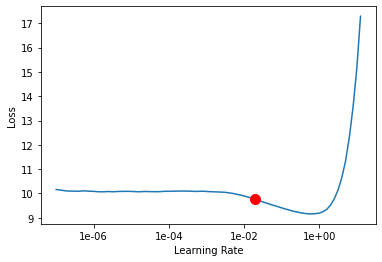

In [73]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)


In [74]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,6.886662,5.304683,0.274256,00:51
1,5.329386,5.075059,0.288765,00:52


In [75]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.552985,5.099328,0.279204,01:01
1,3.892420,4.974069,0.301562,01:01
2,2.832537,5.133093,0.300112,01:01


In [76]:
learn.freeze_to(-1)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-03
Min loss divided by 10: 1.91E-05


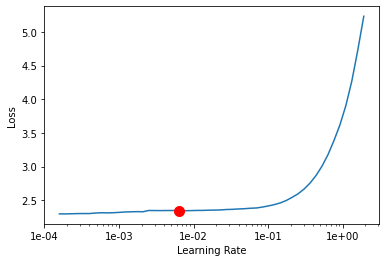

In [77]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [78]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.462945,5.213846,0.296131,00:52
1,2.291742,5.270681,0.297061,00:52
2,2.008070,5.296900,0.296801,00:52


In [79]:
learn.freeze_to(-2)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 8.32E-04
Min loss divided by 10: 2.09E-04


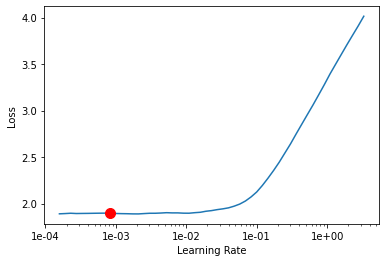

In [80]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [81]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.975927,5.439744,0.292746,00:53
1,1.919492,5.472486,0.291518,00:53
2,1.729602,5.527245,0.290141,00:53


In [82]:
#save the encoder model
learn.save_encoder('my_encoder')

In [83]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [84]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31776 items)
x: TextList
xxbos xxmaj sunny chechi fans evide like adichu power xxunk 🤣 🤣,xxbos xxmaj angane july month ile ende xxunk leave njan angu edukuva xxmaj july 5 nu,xxbos ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്നവർ ലൈക്‌ ബട്ടൺ അടിച്ചു പോളിക്കോ xxrep 11 -,xxbos ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു xxrep 7 . മുൻ കാല collection recordukal ഭേതിച്ചിരിക്കും,xxbos xxmaj trailer powli oru raksha illa . xxmaj xxunk padam xxunk xxunk over degrade venda padam xxunk paraya
y: CategoryList
unknown_state,Positive,unknown_state,Positive,Positive
Path: .;

Valid: LabelList (1766 items)
x: TextList
xxbos xxmaj mammooka ninghal mass aa pwoli item,xxbos xxmaj waiting for xxmaj malayalam movie xxmaj for xxmaj tamil xxunk,xxbos xxunk ഫാൻസിന്റെ വക ഒരു ഒന്നൊന്നര വിജയാശംസകൾ ...,xxbos xxmaj trailer pwolich xxrep 4 u ഓണത്തിന് xxunk xxunk xxrep 4 .,xxbos xxmaj mammoookk xxrep 4 a xxunk katta waiting nv 21
y: CategoryList
Positive,not-malayala

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-01
Min loss divided by 10: 1.45E-02


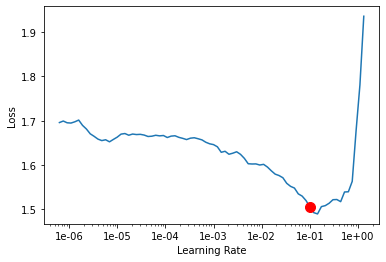

In [85]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [86]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.147218,1.024111,0.593431,0.457089,00:37
1,1.126256,0.978055,0.610985,0.502195,00:36
2,1.072153,0.951187,0.621744,0.517699,00:37


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


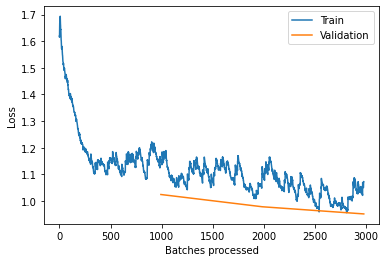

In [87]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 9.12E-04


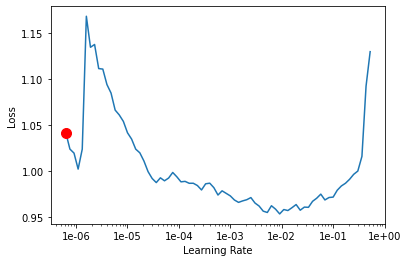

In [88]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [89]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.021236,0.956372,0.638732,0.545514,00:44
1,0.933637,0.901493,0.646093,0.568663,00:44


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 6.92E-07


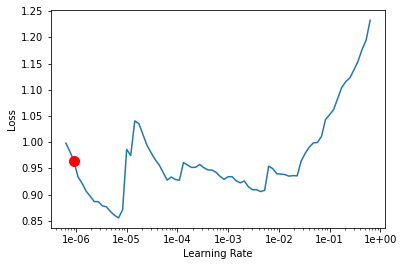

In [90]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [91]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.965711,0.896980,0.659683,0.568942,01:10
1,0.815869,0.858472,0.679502,0.609179,01:11


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [92]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.680724,0.842489,0.678369,0.593816,01:32
1,0.544972,0.856228,0.694790,0.621611,01:32


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.613594,0.875822,0.689128,0.617868,01:42
1,0.417400,0.892129,0.710079,0.642955,01:41


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.367815,0.957100,0.713477,0.642637,01:41
1,0.326283,0.984802,0.709513,0.643685,01:42
2,0.286409,0.994432,0.713477,0.646052,01:42


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [93]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [94]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4
row_0,,,,,
0,28,12,12,0,12
1,11,125,27,0,32
2,39,46,586,12,110
3,0,3,11,118,23
4,24,51,70,11,403


In [95]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[ 28  12  12   0  12]
 [ 11 125  27   0  32]
 [ 39  46 586  12 110]
 [  0   3  11 118  23]
 [ 24  51  70  11 403]]
0.7134767836919592


In [96]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.2745    0.4375    0.3373        64
           1     0.5274    0.6410    0.5787       195
           2     0.8300    0.7390    0.7819       793
           3     0.8369    0.7613    0.7973       155
           4     0.6948    0.7209    0.7076       559

    accuracy                         0.7135      1766
   macro avg     0.6327    0.6599    0.6406      1766
weighted avg     0.7343    0.7135    0.7212      1766

